**Data Generation**
1. No variation
2. Uniform distriibution
3. Normal distribution
4. More complex examples

In [ ]:
import random
import matplotlib.pyplot as plt
%matplotlib inline

No variation.  
This function returns the same value.

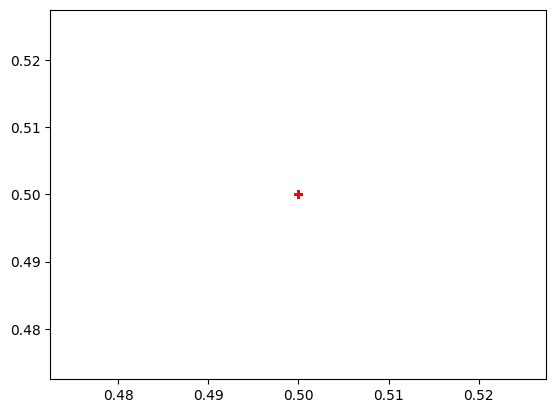

In [ ]:
def generator_1() -> float:
  return 0.5

number_of_data_values = 200
y_data = [generator_1() for _ in range(number_of_data_values)] #generates y data values
x_data = [generator_1() for _ in range(number_of_data_values)] #generates x data values

plt.plot(x_data, y_data, 'r+')      #use red + as markers
plt.show()

Uniform distribution.   
The random.randint returns an int the interval [a, b]. This value is uniformly distributed in the interval. The plot show you what a uniform distribution looks like.   
Examples of this kinds of distibution includes getting a particular number when an unbiased die is tossed.  
Most natural events are NOT uniformly distributed.

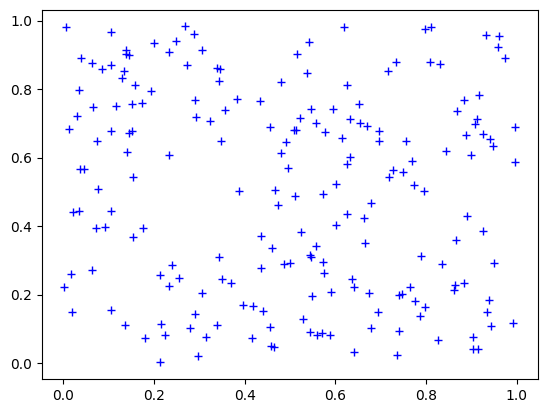

In [ ]:
def generator_2() -> int:
  return random.random()

y_data = [generator_2() for _ in range(number_of_data_values)]
x_data = [generator_2() for _ in range(number_of_data_values)]

plt.plot(x_data, y_data, 'b+')      #use blue plus as markers
plt.show()

49


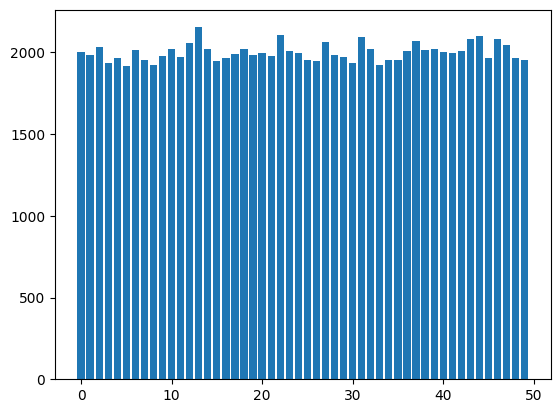

In [ ]:
#a better way to show the distribution
size = 100_000
y_data = [int(generator_2() * 50) for _ in range(size)]
print(max(y_data))
d = {x: 0 for x in range(max(y_data) + 1)}
for x in y_data:
    d[x] += 1

plt.bar(d.keys(), d.values())
plt.show()

Normal/Standard/Gaussian distribution.   
The description of this distribution needs two values a mean and a standard deviation.

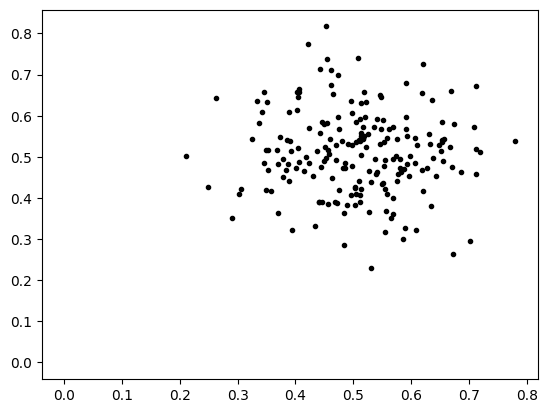

In [ ]:
def generator_3() -> float:
  return random.gauss(0.5, 0.1) # mean and spread

y_data = [generator_3() for _ in range(number_of_data_values)]
x_data = [generator_3() for _ in range(number_of_data_values)]

plt.plot(range(0, 1))
plt.plot(x_data, y_data, 'k.')      #use black dots as markers
plt.show()

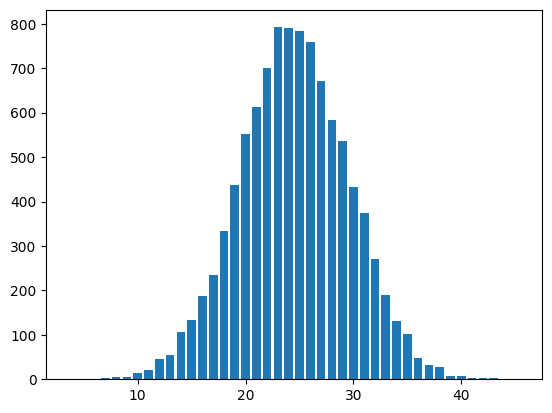

In [ ]:
#a better way to show normal/standard/gaussian distribution
size = 10_000
y_data = [int(generator_3() * 50) for _ in range(size)]
d = {x: 0 for x in range(min(y_data), max(y_data) + 1)}
for x in y_data:
    d[x] += 1

plt.bar(d.keys(), d.values())
plt.show()

The above diagram shows you that the values are not uniformly random, there are more value clustered around the mean and less values away from the mean.

The "shape" of the bars is determined by the two arguments for the *random.gauss* function

In [ ]:
from numpy.core.function_base import linspace
import math
period = 2 * math.pi
number_of_cycles = 5
width = period * number_of_cycles
ordinates = linspace(0, width, 500)

def func1(x):
  return 0

def func2(x):
  return math.sin(x)

def func3(x):
  s = math.sin(x)
  if s > 0:
    s = 1
  elif s < 0:
    s = -1
  else:
    s = 0
  return s

def func4(x):
  return math.pow(math.e, -x* 0.1)

def generate_points_no_noise(func, ordinates):
  return [func(x) for x in ordinates]

def generate_points_uniform_noise(func, ordinated, level):
  return [func(x) + random.randint(-level, level) * 0.01 for x in ordinates]

def generate_points_gaussian_noise(func, ordinated, level):
  return [func(x) + random.gauss(0, level) for x in ordinates]

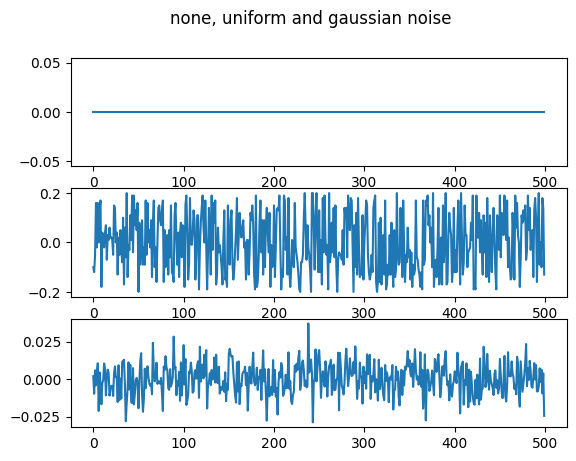

In [ ]:
fig, axs = plt.subplots(3)
fig.suptitle('none, uniform and gaussian noise')
axs[0].plot(generate_points_no_noise(func1, ordinates))
axs[1].plot(generate_points_uniform_noise(func1, ordinates, 20))
axs[2].plot(generate_points_gaussian_noise(func1, ordinates, .01))
plt.show()

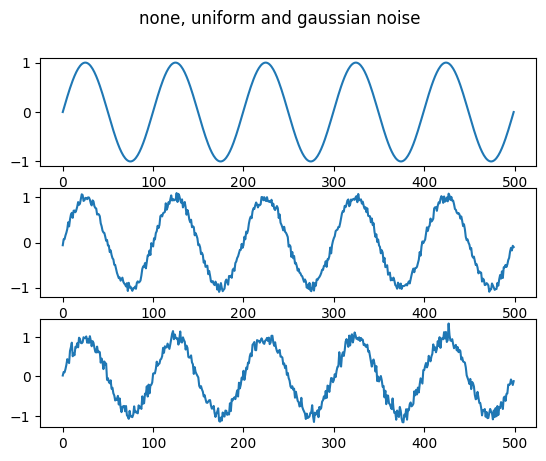

In [ ]:
fig, axs = plt.subplots(3)
fig.suptitle('none, uniform and gaussian noise')
axs[0].plot(generate_points_no_noise(func2, ordinates))
axs[1].plot(generate_points_uniform_noise(func2, ordinates, 10))
axs[2].plot(generate_points_gaussian_noise(func2, ordinates, .1))
plt.show()

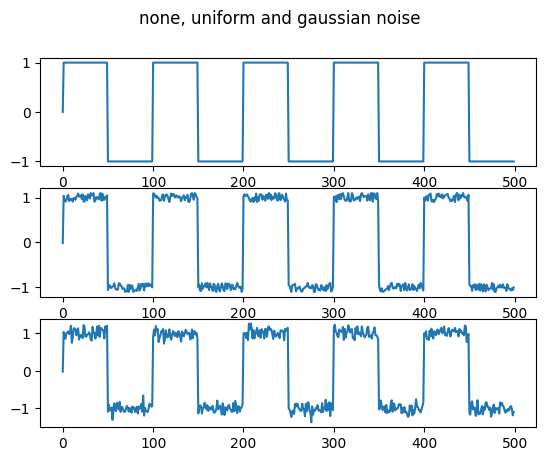

In [ ]:
fig, axs = plt.subplots(3)
fig.suptitle('none, uniform and gaussian noise')
axs[0].plot(generate_points_no_noise(func3, ordinates))
axs[1].plot(generate_points_uniform_noise(func3, ordinates, 10))
axs[2].plot(generate_points_gaussian_noise(func3, ordinates, .1))
plt.show()

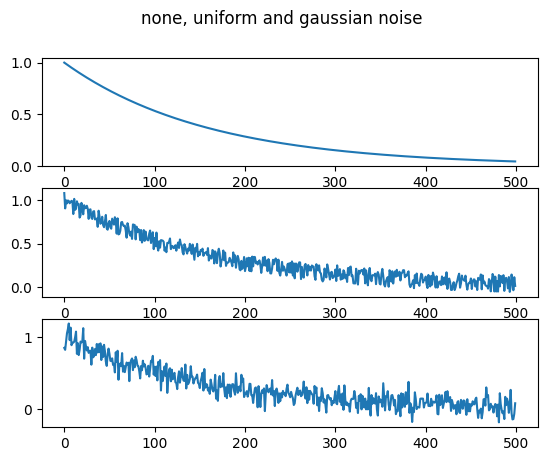

In [ ]:
fig, axs = plt.subplots(3)
fig.suptitle('none, uniform and gaussian noise')
axs[0].plot(generate_points_no_noise(func4, ordinates))
axs[1].plot(generate_points_uniform_noise(func4, ordinates, 10))
axs[2].plot(generate_points_gaussian_noise(func4, ordinates, .1))
plt.show()

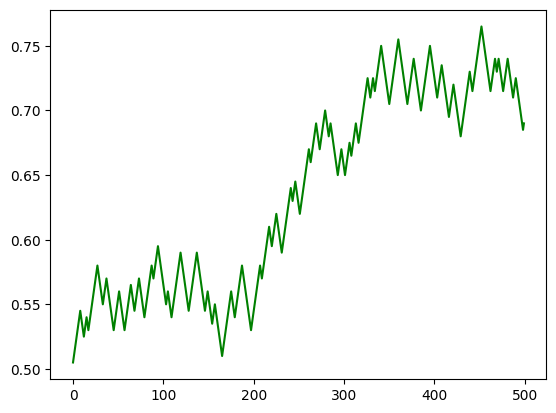

In [ ]:
size = 500
value = {
    'base':0.5,        #the base value, you add or subtract a bit from this
    'delta': 0.005,    #this the change to add or subtract  from the above
    'cycle': 10}       #this is the length of a cycle.
def generator_4() -> float:
  value['cycle'] -= 1  #decrease cycle
  if value['cycle'] == 0: #end of cycle
    value['cycle'] = random.randint(2, 10) #new length the randomize
    value['delta'] *= -1                   #flip the incrementer

  value['base'] +=  value['delta']
  return value['base']

y_data = [generator_4() for _ in range(size)]
plt.plot(y_data, 'g')
plt.show()

#this does not constrain value in the range [0, 1) as required for the lab

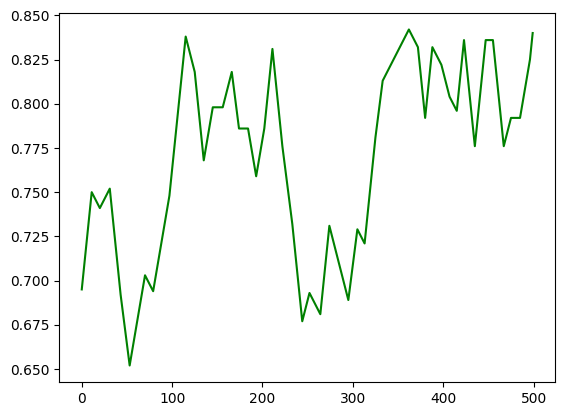

In [ ]:
# changing the delta
def generator_5() -> float:
  value['cycle'] -= 1  #decrease cycle
  if value['cycle'] == 0: #end of cycle
    value['cycle'] = random.randint(8, 12) #new length the randomize
    value['delta'] = random.randint(-5, 5) / 1_000

  value['base'] +=  value['delta']
  return value['base']

y_data = [generator_5() for _ in range(size)]
plt.plot(y_data, 'g')
plt.show()

#this does not constrain the return values in the
#range [0, 1) as required for the lab

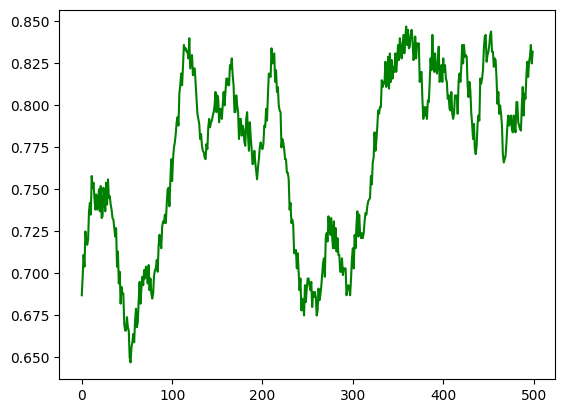

In [ ]:
# adding squiggles
# will reuse the previous set of values
yy_data = [x + random.randint(-5,5) / 500 for x in y_data]

plt.plot(yy_data, 'g')
plt.show()

#this does not constrain value in the range [0, 1) as required for the lab

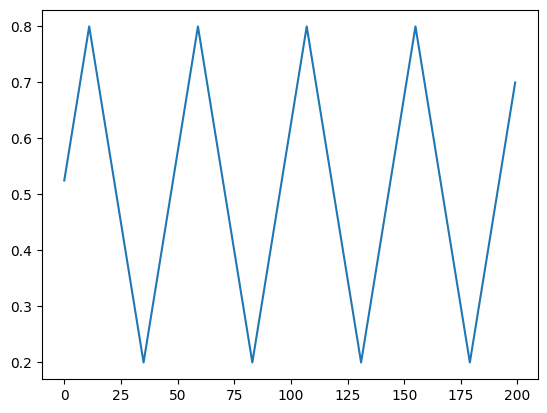

In [ ]:
#generating a saw-tooth waveform
base = 0.5
min = 0.2
max = 0.8
delta = 0.025
size = 200
def generator_6():
  global base, min, max, delta
  if base < min or base > max:
    delta *= -1
  base += delta
  return base

y_data = [generator_6() for _  in range(size)]
plt.plot(y_data)
plt.show()

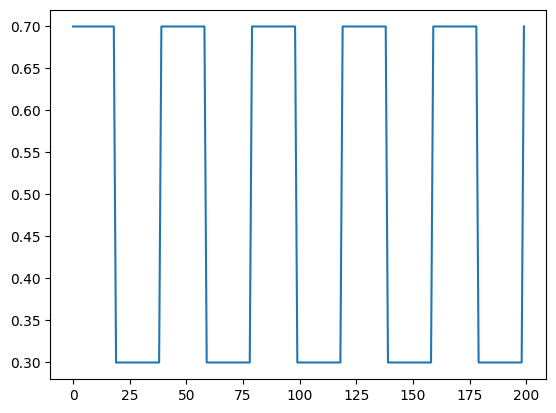

In [ ]:
period = 20
delta = 0.2
size = 200
def generator_7():
  global period, delta
  period -= 1
  if period == 0:
    delta *= -1
    period = 20
  return 0.5 + delta #+ random.randint(-5,5) / 500

y_data = [generator_7() for _  in range(size)]
plt.plot(y_data)
plt.show()